# Lab 3: Bayes Classifier and Boosting

## Jupyter notebooks

In this lab, you can use Jupyter <https://jupyter.org/> to get a nice layout of your code and plots in one document. However, you may also use Python as usual, without Jupyter.

If you have Python and pip, you can install Jupyter with `sudo pip install jupyter`. Otherwise you can follow the instruction on <http://jupyter.readthedocs.org/en/latest/install.html>.

And that is everything you need! Now use a terminal to go into the folder with the provided lab files. Then run `jupyter notebook` to start a session in that folder. Click `lab3.ipynb` in the browser window that appeared to start this very notebook. You should click on the cells in order and either press `ctrl+enter` or `run cell` in the toolbar above to evaluate all the expressions.

Be sure to put `%matplotlib inline` at the top of every code cell where you call plotting functions to get the resulting plots inside the document.

## Import the libraries

In Jupyter, select the cell below and press `ctrl + enter` to import the needed libraries.
Check out `labfuns.py` if you are interested in the details.

In [2]:
import numpy as np
from scipy import misc
from imp import reload
from labfuns import *
import random
import pandas as pd

c:\Users\Lynn\anaconda3\envs\venv\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  This is separate from the ipykernel package so we can avoid doing imports until


## Bayes classifier functions to implement

The lab descriptions state what each function should do.

In [9]:
# NOTE: you do not need to handle the W argument for this part!
# in: labels - N vector of class labels
# out: prior - C x 1 vector of class priors
def computePrior(labels, W=None):
    Npts = labels.shape[0]
    if W is None:
        W = np.ones((Npts,1))/Npts
    else:
        assert(W.shape[0] == Npts)
    classes = np.unique(labels)
    Nclasses = np.size(classes)
    prior = np.zeros((Nclasses,1))

    # TODO: compute the values of prior for each class!
    # ==========================
    for jdx, dif_class in enumerate(classes):
        # num = np.sum(labels == dif_class)
        # prior[jdx] = num / Npts
        idx = np.where(labels == dif_class)[0]
        prior[jdx] = np.sum(W[idx]) / np.sum(W)
    # ==========================
    return prior

# NOTE: you do not need to handle the W argument for this part!
# in:      X - N x d matrix of N data points
#     labels - N vector of class labels
# out:    mu - C x d matrix of class means (mu[i] - class i mean)
#      sigma - C x d x d matrix of class covariances (sigma[i] - class i sigma)
def mlParams(X, labels, W=None):
    assert(X.shape[0]==labels.shape[0])
    Npts,Ndims = np.shape(X)
    classes = np.unique(labels)
    Nclasses = np.size(classes)

    if W is None:
        W = np.ones((Npts,1))/float(Npts)

    mu = np.zeros((Nclasses,Ndims))
    sigma = np.zeros((Nclasses,Ndims,Ndims))

    # TODO: fill in the code to compute mu and sigma!
    # ==========================
    # Without W
    # for jdx, dif_class in enumerate(classes):
    #     idx = np.where(labels == dif_class)[0]
    #     xlc = X[idx] 
    #     mu[jdx] = np.mean(xlc, axis = 0)
    #     diff = xlc - mu[jdx]
    #     mean = np.sum(np.square(diff)/ np.size(idx), axis=0)
    #     sigma[jdx] = np.diag(mean)
    
    # With W
    for jdx, dif_class in enumerate(classes):
        idx = np.where(labels == dif_class)[0]
        xlc = X[idx] * W[idx]
        mu[jdx] = np.sum(xlc, axis=0) / np.sum(W[idx])
        
    for jdx, dif_class in enumerate(classes):
        idx = np.where(labels == dif_class)[0] 
        xlc = X[idx, :]
        diff = xlc - mu[jdx] 
        mean = np.sum(np.square(diff) * W[idx], axis=0) / np.sum(W[idx])
        sigma[jdx] = np.diag(mean) 
    # ==========================

    return mu, sigma

# in:      X - N x d matrix of M? N data points
#      prior - C x 1 matrix of class priors
#         mu - C x d matrix of class means (mu[i] - class i mean)
#      sigma - C x d x d matrix of class covariances (sigma[i] - class i sigma)
# out:     h - N vector of class predictions for test points
def classifyBayes(X, prior, mu, sigma):

    Npts = X.shape[0]
    Nclasses,Ndims = np.shape(mu)
    logProb = np.zeros((Nclasses, Npts))

    # TODO: fill in the code to compute the log posterior logProb!
    # ==========================
    for x_ind in range(Npts):
        for index in range(Nclasses):
            diff = X[x_ind] - mu[index]
            term = np.linalg.multi_dot([diff, np.diag(1/np.diag(sigma[index])), diff])
            logProb[index][x_ind] = np.log(prior[index]) - (1/2) * np.log(np.linalg.det(sigma[index])) - term
    # ==========================
    
    # one possible way of finding max a-posteriori once
    # you have computed the log posterior
    h = np.argmax(logProb,axis=0)
    return h

The implemented functions can now be summarized into the `BayesClassifier` class, which we will use later to test the classifier, no need to add anything else here:

In [10]:
# NOTE: no need to touch this
class BayesClassifier(object):
    def __init__(self):
        self.trained = False

    def trainClassifier(self, X, labels, W=None):
        rtn = BayesClassifier()
        rtn.prior = computePrior(labels, W)
        rtn.mu, rtn.sigma = mlParams(X, labels, W)
        rtn.trained = True
        return rtn

    def classify(self, X):
        return classifyBayes(X, self.prior, self.mu, self.sigma)

## Test the Maximum Likelihood estimates

Call `genBlobs` and `plotGaussian` to verify your estimates.

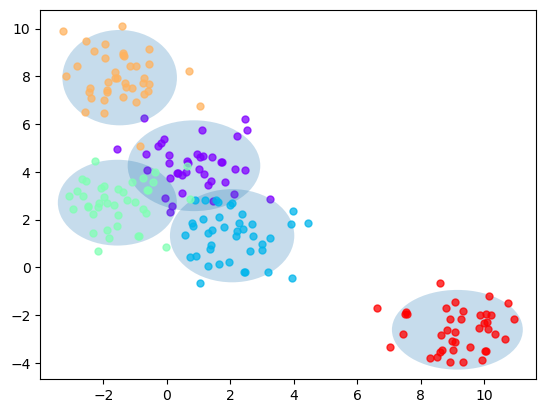

In [242]:
%matplotlib inline

X, labels = genBlobs(centers=5)
mu, sigma = mlParams(X,labels)
plotGaussian(X,labels,mu,sigma)

Call the `testClassifier` and `plotBoundary` functions for this part.

In [243]:
testClassifier(BayesClassifier(), dataset='iris', split=0.7)

Trial: 0 Accuracy 84.4
Trial: 10 Accuracy 97.8
Trial: 20 Accuracy 91.1
Trial: 30 Accuracy 86.7
Trial: 40 Accuracy 88.9
Trial: 50 Accuracy 91.1
Trial: 60 Accuracy 86.7
Trial: 70 Accuracy 91.1
Trial: 80 Accuracy 86.7
Trial: 90 Accuracy 91.1
Final mean classification accuracy  89.2 with standard deviation 4.19


In [244]:
testClassifier(BayesClassifier(), dataset='vowel', split=0.7)

Trial: 0 Accuracy 52.6
Trial: 10 Accuracy 61.7
Trial: 20 Accuracy 68.2
Trial: 30 Accuracy 62.3
Trial: 40 Accuracy 56.5
Trial: 50 Accuracy 63
Trial: 60 Accuracy 64.3
Trial: 70 Accuracy 62.3
Trial: 80 Accuracy 60.4
Trial: 90 Accuracy 65.6
Final mean classification accuracy  61.3 with standard deviation 3.48


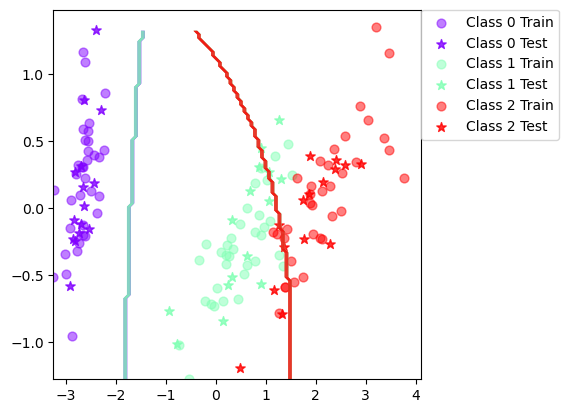

In [11]:
%matplotlib inline
plotBoundary(BayesClassifier(), dataset='iris',split=0.7)

#### When can a feature independence assumption be reasonable and when not?
**Resonable**
- In some types of data, such as sensor data or image data, the features may be naturally independent of each other. For example, in an image, the intensity of one pixel is often not related to the intensity of another pixel.
- When the features are generated by different sensors or measurements that are physically or spatially separated, it may be reasonable to assume that they are independent of each other.
- When the features are selected or engineered in such a way that they do not exhibit any correlations with each other, such as by using feature selection or feature extraction techniques.  

**Unreasonable**
- In many real-world datasets, the features are often correlated with each other, and ignoring these correlations can lead to inaccurate models. For example, in a dataset of housing prices, the number of bedrooms may be strongly correlated with the size of the house, which in turn may be strongly correlated with the price of the house.
- When the features interact with each other in non-linear ways in a large system, such as in many physical and biological systems, it may be unreasonable to assume that they are independent of each other. In these cases, more complex models that capture the interactions between features may be necessary.
- When the features are generated by complex processes that are not well-understood, it may be difficult to determine whether they are independent of each other or not. In these cases, it may be necessary to perform exploratory data analysis and/or use more flexible models that can capture complex dependencies between features.


#### How does the decision boundary look for the Iris dataset? How could one improve the classification results for this scenario by changing classifier or, alternatively, manipulating the data?
The decision boudry between class 0 and class 1 is perfect since they are scattered and easily classified. However, the decision boundary between class 1 and class 2 is not so good as some of the points are mixed or even overlapped. Maybe we can use the SVM because SVM could project the low-dimension data into high-dimension space by using the kernel function, which makes them easily seperated in the high-dimension space just like class 0 and class 1. Using a high variance mutliclass algorithm like random forest or boosting on the Naive Bayes classifiers are also optional.

## Boosting functions to implement

The lab descriptions state what each function should do.

In [ ]:
# in: base_classifier - a classifier of the type that we will boost, e.g. BayesClassifier
#                   X - N x d matrix of N data points
#              labels - N vector of class labels
#                   T - number of boosting iterations
# out:    classifiers - (maximum) length T Python list of trained classifiers
#              alphas - (maximum) length T Python list of vote weights
def trainBoost(base_classifier, X, labels, T=10):
    # these will come in handy later on
    Npts,Ndims = np.shape(X)

    classifiers = [] # append new classifiers to this list
    alphas = [] # append the vote weight of the classifiers to this list

    # The weights for the first iteration
    wCur = np.ones((Npts,1))/float(Npts)

    for i_iter in range(0, T):
        # a new classifier can be trained like this, given the current weights
        classifiers.append(base_classifier.trainClassifier(X, labels, wCur))

        # do classification for each point
        vote = classifiers[-1].classify(X)

        # TODO: Fill in the rest, construct the alphas etc.
        # ==========================
        epsilon = 0
        classes = np.unique(labels)
        for jdx in classes:
            idx = np.where(vote == jdx)[0]
            epsilon += np.sum(wCur[idx] * (vote[idx] != labels[idx]))

        alpha = (1/2) * (np.log(1 - epsilon) - np.log(epsilon)) 
        alphas.append(alpha) # you will need to append the new alpha

        wOld = wCur
        for i in range(Npts):
            wCur[i] = wOld[i] * np.exp(alpha * (-1) ** (vote[i] == labels[i]))
        wCur = wCur / np.sum(wCur)
        # ==========================
        
    return classifiers, alphas

# in:       X - N x d matrix of N data points
# classifiers - (maximum) length T Python list of trained classifiers as above
#      alphas - (maximum) length T Python list of vote weights
#    Nclasses - the number of different classes
# out:  yPred - N vector of class predictions for test points
def classifyBoost(X, classifiers, alphas, Nclasses):
    Npts = X.shape[0]
    Ncomps = len(classifiers)

    # if we only have one classifier, we may just classify directly
    if Ncomps == 1:
        return classifiers[0].classify(X)
    else:
        votes = np.zeros((Npts,Nclasses))

        # TODO: implement classificiation when we have trained several classifiers!
        # here we can do it by filling in the votes vector with weighted votes
        # ==========================
        for i in range(Ncomps):
            classified = classifiers[i].classify(X)
            for j in range(Npts):
                votes[j][classified[j]] += alphas[i] 

        # ==========================

        # one way to compute yPred after accumulating the votes
        return np.argmax(votes,axis=1)

The implemented functions can now be summarized another classifer, the `BoostClassifier` class. This class enables boosting different types of classifiers by initializing it with the `base_classifier` argument. No need to add anything here.

In [ ]:
# NOTE: no need to touch this
class BoostClassifier(object):
    def __init__(self, base_classifier, T=10):
        self.base_classifier = base_classifier
        self.T = T
        self.trained = False

    def trainClassifier(self, X, labels):
        rtn = BoostClassifier(self.base_classifier, self.T)
        rtn.nbr_classes = np.size(np.unique(labels))
        rtn.classifiers, rtn.alphas = trainBoost(self.base_classifier, X, labels, self.T)
        rtn.trained = True
        return rtn

    def classify(self, X):
        return classifyBoost(X, self.classifiers, self.alphas, self.nbr_classes)

## Run some experiments

Call the `testClassifier` and `plotBoundary` functions for this part.

In [230]:
testClassifier(BoostClassifier(BayesClassifier(), T=10), dataset='iris',split=0.7)

Trial: 0 Accuracy 100


c:\Users\Lynn\anaconda3\envs\venv\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in log
c:\Users\Lynn\anaconda3\envs\venv\lib\site-packages\ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in true_divide
c:\Users\Lynn\anaconda3\envs\venv\lib\site-packages\numpy\linalg\linalg.py:2158: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


Trial: 10 Accuracy 97.8
Trial: 20 Accuracy 93.3
Trial: 30 Accuracy 93.3
Trial: 40 Accuracy 97.8
Trial: 50 Accuracy 86.7
Trial: 60 Accuracy 93.3
Trial: 70 Accuracy 95.6
Trial: 80 Accuracy 93.3
Trial: 90 Accuracy 95.6
Final mean classification accuracy  94.2 with standard deviation 6.83


In [231]:
testClassifier(BoostClassifier(BayesClassifier(), T=10), dataset='vowel',split=0.7)

Trial: 0 Accuracy 68.8
Trial: 10 Accuracy 77.9
Trial: 20 Accuracy 77.3
Trial: 30 Accuracy 70.1
Trial: 40 Accuracy 68.8
Trial: 50 Accuracy 68.2
Trial: 60 Accuracy 77.3
Trial: 70 Accuracy 70.8
Trial: 80 Accuracy 71.4
Trial: 90 Accuracy 82.5
Final mean classification accuracy  74.1 with standard deviation 3.73


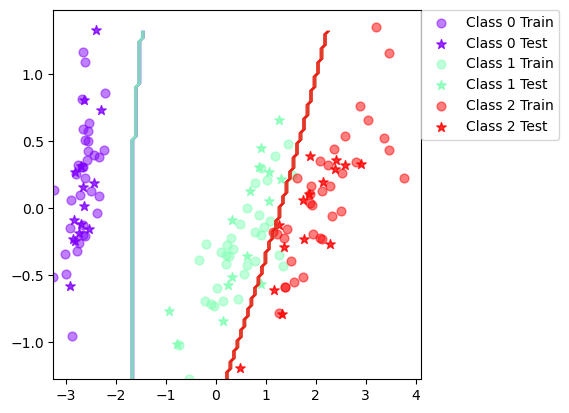

In [232]:
%matplotlib inline
plotBoundary(BoostClassifier(BayesClassifier()), dataset='iris',split=0.7)

Now repeat the steps with a decision tree classifier.

In [253]:
testClassifier(DecisionTreeClassifier(), dataset='iris', split=0.7)

Trial: 0 Accuracy 95.6
Trial: 10 Accuracy 100
Trial: 20 Accuracy 91.1
Trial: 30 Accuracy 91.1
Trial: 40 Accuracy 93.3
Trial: 50 Accuracy 91.1
Trial: 60 Accuracy 88.9
Trial: 70 Accuracy 88.9
Trial: 80 Accuracy 93.3
Trial: 90 Accuracy 88.9
Final mean classification accuracy  92.4 with standard deviation 3.71


In [252]:
testClassifier(BoostClassifier(DecisionTreeClassifier(), T=10), dataset='iris',split=0.7)

Trial: 0 Accuracy 95.6
Trial: 10 Accuracy 100
Trial: 20 Accuracy 95.6
Trial: 30 Accuracy 93.3
Trial: 40 Accuracy 93.3
Trial: 50 Accuracy 95.6
Trial: 60 Accuracy 88.9
Trial: 70 Accuracy 93.3
Trial: 80 Accuracy 93.3
Trial: 90 Accuracy 93.3
Final mean classification accuracy  94.6 with standard deviation 3.65


In [235]:
testClassifier(DecisionTreeClassifier(), dataset='vowel',split=0.7)

Trial: 0 Accuracy 63.6
Trial: 10 Accuracy 68.8
Trial: 20 Accuracy 63.6
Trial: 30 Accuracy 66.9
Trial: 40 Accuracy 59.7
Trial: 50 Accuracy 63
Trial: 60 Accuracy 59.7
Trial: 70 Accuracy 68.8
Trial: 80 Accuracy 59.7
Trial: 90 Accuracy 68.2
Final mean classification accuracy  64.1 with standard deviation 4


In [236]:
testClassifier(BoostClassifier(DecisionTreeClassifier(), T=10), dataset='vowel',split=0.7)

Trial: 0 Accuracy 85.7
Trial: 10 Accuracy 85.7
Trial: 20 Accuracy 87.7
Trial: 30 Accuracy 91.6
Trial: 40 Accuracy 84.4
Trial: 50 Accuracy 79.2
Trial: 60 Accuracy 89
Trial: 70 Accuracy 86.4
Trial: 80 Accuracy 88.3
Trial: 90 Accuracy 89
Final mean classification accuracy  86.5 with standard deviation 3.15


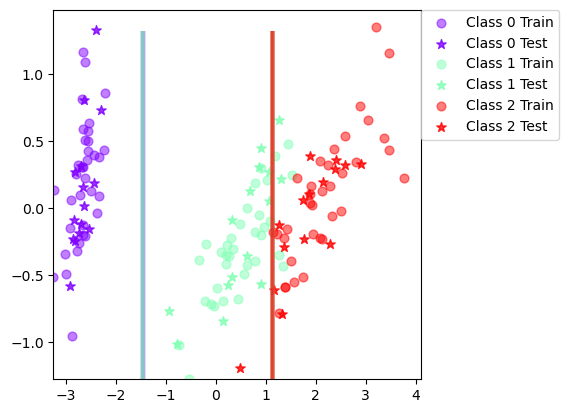

In [237]:
%matplotlib inline
plotBoundary(DecisionTreeClassifier(), dataset='iris',split=0.7)

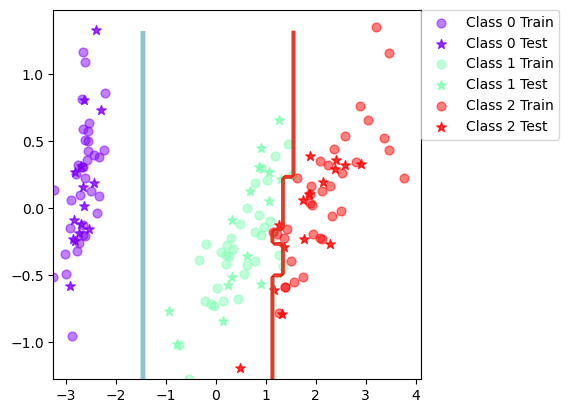

In [238]:
%matplotlib inline
plotBoundary(BoostClassifier(DecisionTreeClassifier(), T=10), dataset='iris',split=0.7)

In [13]:
comparison = pd.DataFrame([[89.2, 61.3], [94.2, 74.1], [64.1, 86.5],[92.4, 94.6]], index=["Naive Bayes Without Boosting", "Naive Bayes with Boosting", "Decision Tree Without Boosting", "Decision Tree with Boosting"], columns=["Iris", "Vowel"]);
print(comparison)

                                Iris  Vowel
Naive Bayes Without Boosting    89.2   61.3
Naive Bayes with Boosting       94.2   74.1
Decision Tree Without Boosting  64.1   86.5
Decision Tree with Boosting     92.4   94.6


#### Is there any improvement in classification accuracy? Why/why not?
Naive Bayes:  
Yes, the accuracy of the classification in both Iris and Vowel improves. This is because boosting helps decrease the bias of the Naive Bayes model.  
Decision Tree:  
No, the accuracy of the classification in both Iris and Vowel decreases. This is because decision tree is a low bias and high variance model. Boosting doen't help in this case.

#### Plot the decision boundary of the boosted classifier on iris and compare it with that of the basic. What differences do you notice? Is the boundary of the boosted version more complex?
Naive Bayes: 
The decision boundary of the boosted classifier looks like a composite of small boundaries and with more edges.
Yes it's more complex.  
Decision Tree:
It's the same as Naive Bayes.

#### Can we make up for not using a more advanced model in the basic classifier(e.g. independent features) by using boosting?
Boosting helps decrease the bias of high bias model thus improving accuracy. But it may be useless or even have side-effect in the low bias model. And boosting can't compensate for the lack of expressiveness in the basic classifier's feature representation. If the basic classifier is limited by its feature representation, boosting may only lead to marginal improvements in performance, and we'd better use the advanced model.  

We can see in the case of Naive Bayes, boosting do helps increase the accuracy. But in the case of decision tree, the accuracy decreases.

#### If you had to pick a classifier, naive Bayes or a decision tree or the boosted versions of these, which one would you pick? Motivate from the following criteria:
#### - Outliers
#### - Irrelevant inputs: part of the feature space is irrelevant
#### - Predictive power
#### - Mixed types of data: binary, categorical or continuous features, etc.
#### - Scalability: the dimension of the data, D, is large or the number of instances, N, is large, or both.  

- Outliers：Boosted Decision trees. Decision trees can handle outliers well since they partition the feature space into regions and are not affected by outliers that fall outside these regions. Naive Bayes may be influenced by outliers since it assumes independence between features. Boosted versions of decision tree can improve their robustness to outliers by combining multiple weak classifiers into a strong ensemble.

- Irrelevant inputs: part of the feature space is irrelevant: Boosted Decision Tree.  Decision trees are known for their feature selection capabilities, and they can identify and ignore irrelevant inputs. Naive Bayes can be sensitive to irrelevant features since it assumes that all features are independent. Boosted versions of decision tree can improve their ability to handle irrelevant inputs by selecting the most informative features and downweighting the less informative ones.

- Predictive power: Boosted versions of decision trees have shown to achieve high predictive power when the data is complex and are often used in real-world applications. Naive Bayes may struggle with complex dependencies between the features.  

- Mixed types of data: Both naive Bayes and decision tree classifiers are capable of handling mixed types of data. Boosted versions of these classifiers can further improve their ability to handle mixed types of data.

- Scalability: Naive Bayes is known for its scalability, and it can handle large datasets with a high number of features efficiently. Decision trees' performance can degrade when trees are too large.Boosted versions of these classifiers may require more computational resources and may not scale well

## Bonus: Visualize faces classified using boosted decision trees

Note that this part of the assignment is completely voluntary! First, let's check how a boosted decision tree classifier performs on the olivetti data. Note that we need to reduce the dimension a bit using PCA, as the original dimension of the image vectors is `64 x 64 = 4096` elements.

In [239]:
testClassifier(BayesClassifier(), dataset='olivetti',split=0.7, dim=20)

Trial: 0 Accuracy 82.5
Trial: 10 Accuracy 88.3
Trial: 20 Accuracy 83.3
Trial: 30 Accuracy 85.8
Trial: 40 Accuracy 86.7
Trial: 50 Accuracy 80.8
Trial: 60 Accuracy 88.3
Trial: 70 Accuracy 81.7
Trial: 80 Accuracy 79.2
Trial: 90 Accuracy 84.2
Final mean classification accuracy  84.2 with standard deviation 3.23


In [261]:
testClassifier(DecisionTreeClassifier(), dataset='olivetti',split=0.7, dim=20)

Trial: 0 Accuracy 65.8
Trial: 10 Accuracy 57.5
Trial: 20 Accuracy 49.2
Trial: 30 Accuracy 50
Trial: 40 Accuracy 53.3
Trial: 50 Accuracy 44.2
Trial: 60 Accuracy 49.2
Trial: 70 Accuracy 54.2
Trial: 80 Accuracy 50
Trial: 90 Accuracy 52.5
Final mean classification accuracy  48.4 with standard deviation 6.45


In [240]:
testClassifier(BoostClassifier(DecisionTreeClassifier(), T=10), dataset='olivetti',split=0.7, dim=20)

Trial: 0 Accuracy 78.3
Trial: 10 Accuracy 72.5
Trial: 20 Accuracy 78.3
Trial: 30 Accuracy 73.3
Trial: 40 Accuracy 75
Trial: 50 Accuracy 70.8
Trial: 60 Accuracy 73.3
Trial: 70 Accuracy 70.8
Trial: 80 Accuracy 70.8
Trial: 90 Accuracy 72.5
Final mean classification accuracy  71.2 with standard deviation 6.5


You should get an accuracy around 70%. If you wish, you can compare this with using pure decision trees or a boosted bayes classifier. Not too bad, now let's try and classify a face as belonging to one of 40 persons!

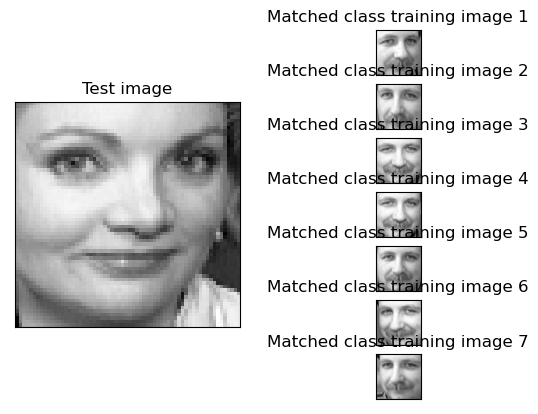

In [241]:
%matplotlib inline
X,y,pcadim = fetchDataset('olivetti') # fetch the olivetti data
xTr,yTr,xTe,yTe,trIdx,teIdx = trteSplitEven(X,y,0.7) # split into training and testing
pca = decomposition.PCA(n_components=20) # use PCA to reduce the dimension to 20
pca.fit(xTr) # use training data to fit the transform
xTrpca = pca.transform(xTr) # apply on training data
xTepca = pca.transform(xTe) # apply on test data
# use our pre-defined decision tree classifier together with the implemented
# boosting to classify data points in the training data
classifier = BoostClassifier(DecisionTreeClassifier(), T=10).trainClassifier(xTrpca, yTr)
yPr = classifier.classify(xTepca)
# choose a test point to visualize
testind = random.randint(0, xTe.shape[0]-1)
# visualize the test point together with the training points used to train
# the class that the test point was classified to belong to
visualizeOlivettiVectors(xTr[yTr == yPr[testind],:], xTe[testind,:])